In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy import integrate
import sympy as sy

# Generating Simple integrals

In [ ]:
def generate_poly(degree):
    """
    Generates a random polynomial of a specified degree.

    Parameters:
    degree (int): The degree of the polynomial to be generated.

    Returns:
    tuple: Two numpy arrays, poly (coefficients of the polynomial)
           and degrees (degrees of each term in the polynomial).
    """
    # Initialize arrays for polynomial coefficients and their degrees
    poly = np.zeros(10)
    degrees = np.zeros(10)

    # Generate random coefficients and degrees for each term of the polynomial
    for i in range(degree - 1):
        poly[i + 1] = np.random.randint(0, 10)  # Random coefficient between 0 and 10
        degrees[i + 1] = np.random.randint(2, 20)  # Random degree between 2 and 20

    return poly, degrees

def integral(degree):
    """
    Computes the integral of 1 over a polynomial (plus a small number epsilon)
    over a random interval [0, a] and plots the result.

    Parameters:
    degree (int): The degree of the polynomial used in the integral.

    Returns:
    tuple: The polynomial and its degrees used in the integration.
    """
    # Generate a random polynomial
    poly, degrees = generate_poly(degree)

    # Generate a random upper limit for the integration interval
    a = np.random.uniform(0, 100)

    # Create an array of epsilon values (logarithmically spaced)
    eps_list = 10.**np.linspace(-6, 10, 100)

    # Define the function to integrate
    def integrand(x, eps):
        return 1 / (eps + sum(poly[i] * x**degrees[i] for i in range(len(poly))))

    # Compute the integral for each epsilon
    I_eps = [integrate.quad(integrand, 0, a, args=(eps,))[0] for eps in eps_list]

    # Plotting
    plt.rcParams.update({'font.size': 22})
    plt.figure(figsize=(15, 10))
    plt.loglog(eps_list, np.abs(I_eps), 'o', mfc='none', markersize=10, label='numerical')
    plt.xlabel('$\epsilon$')
    plt.ylabel('Integral')
    plt.legend(loc='best')

    return poly, degrees, a

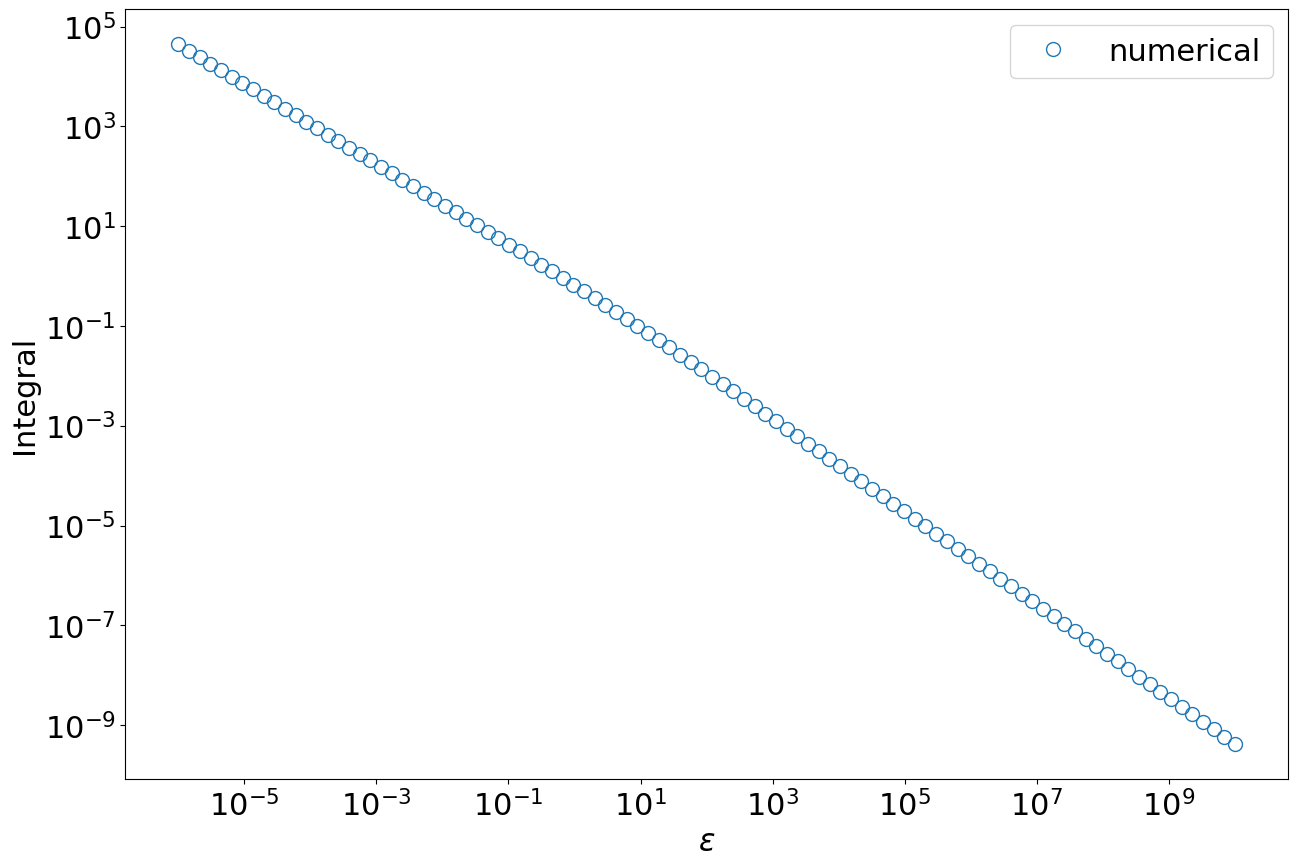

In [ ]:
poly, degrees, a = integral(7)

In [ ]:
ep = sy.symbols('\epsilon')
x = sy.symbols('x')
print(degrees)
eq = ep+poly[1]*x**degrees[1] + poly[2]*x**degrees[2] +poly[3]*x**degrees[3] + poly[4]*x**degrees[4]+poly[5]*x**degrees[5]+poly[6]*x**degrees[6] + poly[7]*x**degrees[7] + poly[8]*x**degrees[8]+ poly[9]*x**degrees[9]

[ 0.  5.  6. 15.  5. 15. 12.  0.  0.  0.]


In [ ]:
eq

\epsilon + 8.0*x**5.0 + 2.0*x**6.0 + 5.0*x**12.0 + 6.0*x**15.0

## Format Latex

In [ ]:
def format_integral_question(poly, degrees, a):
    """
    Creates a LaTeX-formatted question string that includes the integral expression,
    combining terms of the same order in the polynomial.

    Parameters:
    poly (numpy array): Coefficients of the polynomial.
    degrees (numpy array): Degrees of each term in the polynomial.
    a (float): Upper bound of the integration interval.

    Returns:
    str: A LaTeX string representing the question with the integral.
    """
    x = sy.symbols('x')  # Define the symbol for x
    polynomial = sum(poly[i] * x**degrees[i] for i in range(len(poly)))  # Construct the polynomial

    # Convert the polynomial to a LaTeX string
    polynomial_latex = sy.latex(polynomial)

    # Format the entire integral expression
    latex_str = r'Consider the integral \( I(\epsilon) = \int_0^{' + f'{a:.2f}' + r'} \frac{1}{\epsilon + ' + polynomial_latex + r'} \, dx \). Develop an analytical formula for \( I(\epsilon) \).'

    return latex_str

In [ ]:
latex_question = format_integral_question(poly, degrees, a)
print(latex_question)

Consider the integral \( I(\epsilon) = \int_0^{33.07} \frac{1}{\epsilon + 8.0 x^{5.0} + 2.0 x^{6.0} + 5.0 x^{12.0} + 6.0 x^{15.0}} \, dx \). Develop an analytical formula for \( I(\epsilon) \).


# Finding Approximate Solutions to these simple integrals

### Small $\epsilon$

Find the small number of an array that is not zero


In [ ]:
def find_smallest(array):
    """
    Finds the smallest non-zero element in an array and its index.

    Parameters:
    array (list or numpy array): The array to search in.

    Returns:
    tuple: A tuple containing the smallest non-zero element and its index.
    """
    # Initialize lists to store non-zero values and their indices
    tempval = []
    tempindex = []

    # Iterate through the array
    for i, value in enumerate(array):
        if value != 0:
            tempval.append(value)    # Add non-zero value to tempval
            tempindex.append(i)      # Add index of non-zero value to tempindex

    # Find the minimum among the non-zero values
    min_value = np.min(tempval)
    # Find the index of this minimum value in tempval
    min_index = np.argmin(tempval)
    # Retrieve the corresponding index in the original array
    original_index = tempindex[min_index]

    return min_value, original_index

### Large $\epsilon$

In [ ]:
def find_largest(array):
    """
    Finds the largest non-zero element in an array and its index.

    Parameters:
    array (list or numpy array): The array to search in.

    Returns:
    tuple: A tuple containing the largest non-zero element and its index.
    """
    # Initialize lists to store non-zero values and their indices
    tempval = []
    tempindex = []

    # Iterate through the array
    for i, value in enumerate(array):
        if value != 0:
            tempval.append(value)    # Add non-zero value to tempval
            tempindex.append(i)      # Add index of non-zero value to tempindex

    # Find the maximum among the non-zero values
    max_value = np.max(tempval)
    # Find the index of this maximum value in tempval
    max_index = np.argmax(tempval)
    # Retrieve the corresponding index in the original array
    original_index = tempindex[max_index]

    return max_value, original_index

### Combining them all together

In [ ]:
def solve_simple_integral(degree):
    # Generate a random polynomial of the given degree
    poly, degrees = generate_poly(degree)

    # Random upper limit for the integral
    a = np.random.randint(0, 100)

    latex_question = format_integral_question(poly, degrees, a)
    # display(latex_question)

    # Create an array of epsilon values
    eps_list = np.logspace(-6, 15, 100)

    # Compute the integral numerically for each epsilon
    I_eps = [integrate.quad(lambda x: 1/(eps + sum(poly[i] * x**degrees[i] for i in range(len(poly)))), 0, a)[0] for eps in eps_list]

    # Find the smallest and largest non-zero degrees in the polynomial
    deg1, ind1 = find_smallest(degrees)
    deg, ind = find_largest(degrees)

    # Approximate the integral for small and large epsilon values
    smalleps = [1/eps * (1/poly[ind1]*eps)**(1/deg1) for eps in eps_list]
    bigeps = [1/eps * (1/poly[ind]*eps)**(1/deg) for eps in eps_list]

    # Define epsilon as a sympy symbol
    epsilon = sy.Symbol('epsilon')

    # Symbolic expressions for the approximations
    smalleps_expr = 1/epsilon * (1/poly[ind1]*epsilon)**(1/deg1)
    bigeps_expr = 1/epsilon * (1/poly[ind]*epsilon)**(1/deg)

    # Convert the expressions to LaTeX
    smalleps_latex = sy.latex(smalleps_expr)
    bigeps_latex = sy.latex(bigeps_expr)
    # Create the LaTeX explanation
    explanation = r"""
    The integral is of the form \( I(\epsilon) = \int_0^{%s} \frac{1}{\epsilon + P(x)} \, dx \) where \( P(x) \) is a polynomial.
    The integrand is maximum at \( x = 0 \), with a height of \( \frac{1}{\epsilon} \).

    For small \( \epsilon \):
    We define the width as the point where the integrand becomes half of its maximum height.
    This corresponds to solving \( P(x) = \epsilon \).
    Applying dominant balance, considering the term in \( P(x) \) with the smallest degree, the width is approximated as \( \left( \frac{1}{%s*\epsilon} \right)^{1/%s} \).
    Therefore, the approximation for the integral for small \( \epsilon \) is \( I(\epsilon) = %s \).

    For large \( \epsilon \):
    Similarly, we define the width based on the term with the largest degree.
    The width is approximated as \( \left( \frac{1}{%s*\epsilon} \right)^{1/%s} \).
    Therefore, the approximation for the integral for large \( \epsilon \) is \( I(\epsilon) = %s \).
    """ % (a, poly[ind1], deg1, smalleps_latex, poly[ind], deg, bigeps_latex)

    # display(explanation)

    # Plotting the results
    plt.rcParams.update({'font.size': 22})
    plt.figure(figsize=(15, 10))
    plt.loglog(eps_list, np.abs(I_eps), 'o', mfc='none', markersize=10, label='Numerical Integration')
    plt.loglog(eps_list, smalleps, label='Approximation for small $\epsilon$')
    plt.loglog(eps_list, bigeps, label='Approximation for large $\epsilon$')
    plt.xlabel('$\epsilon$')
    plt.ylabel('Integral')
    plt.legend(loc='best')



    return latex_question, explanation

('Consider the integral \\( I(\\epsilon) = \\int_0^{28.00} \\frac{1}{\\epsilon + 9.0 x^{3.0} + 4.0 x^{10.0} + 1.0 x^{15.0} + 7.0 x^{17.0}} \\, dx \\). Develop an analytical formula for \\( I(\\epsilon) \\).',
 '\n    The integral is of the form \\( I(\\epsilon) = \\int_0^{28} \\frac{1}{\\epsilon + P(x)} \\, dx \\) where \\( P(x) \\) is a polynomial.\n    The integrand is maximum at \\( x = 0 \\), with a height of \\( \\frac{1}{\\epsilon} \\).\n\n    For small \\( \\epsilon \\):\n    We define the width as the point where the integrand becomes half of its maximum height.\n    This corresponds to solving \\( P(x) = \\epsilon \\).\n    Applying dominant balance, considering the term in \\( P(x) \\) with the smallest degree, the width is approximated as \\( \\left( \\frac{1}{2.0*\\epsilon} \\right)^{1/3.0} \\).\n    Therefore, the approximation for the integral for small \\( \\epsilon \\) is \\( I(\\epsilon) = \\frac{0.7937005259841}{\\epsilon^{0.666666666666667}} \\).\n\n    For large \\(

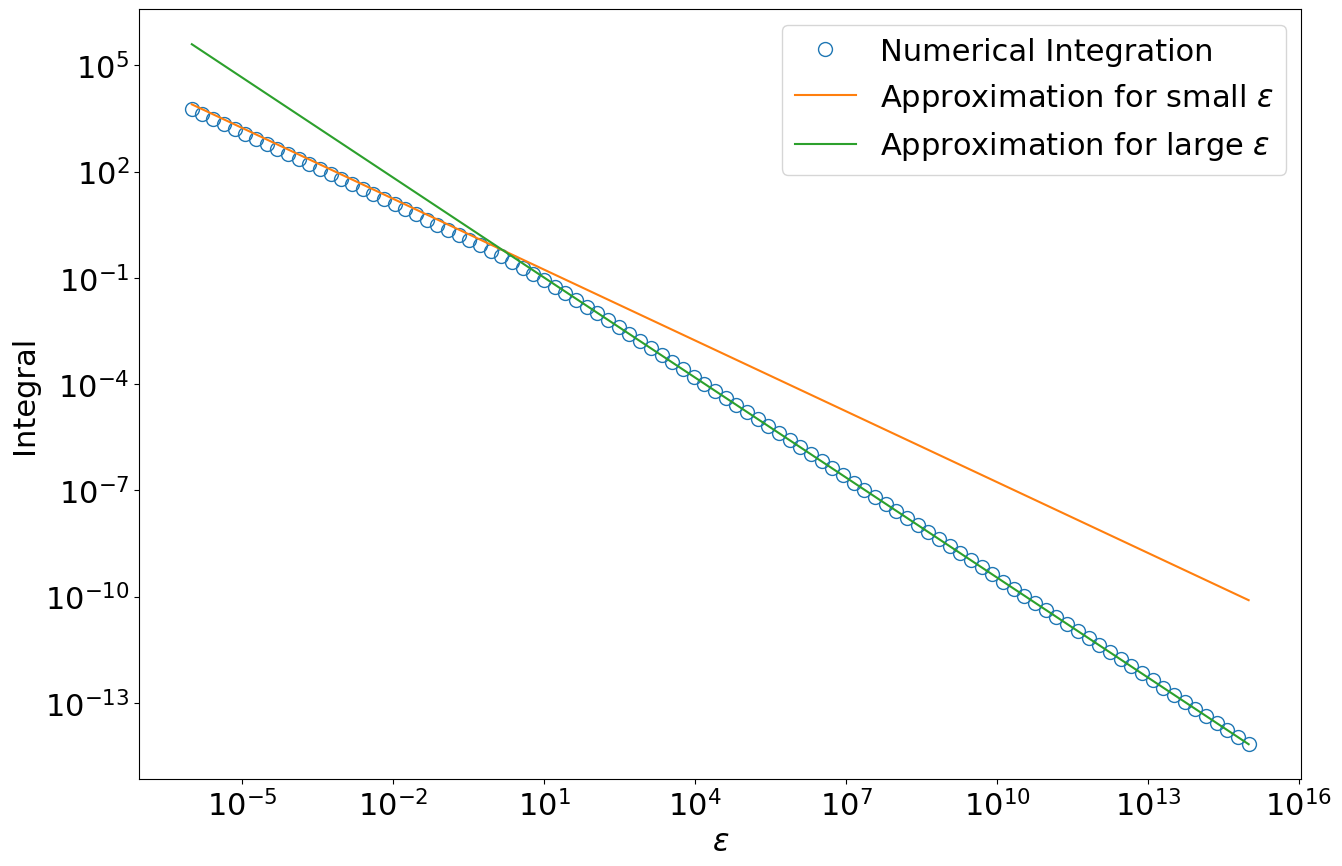

In [ ]:
solve_simple_integral(7)

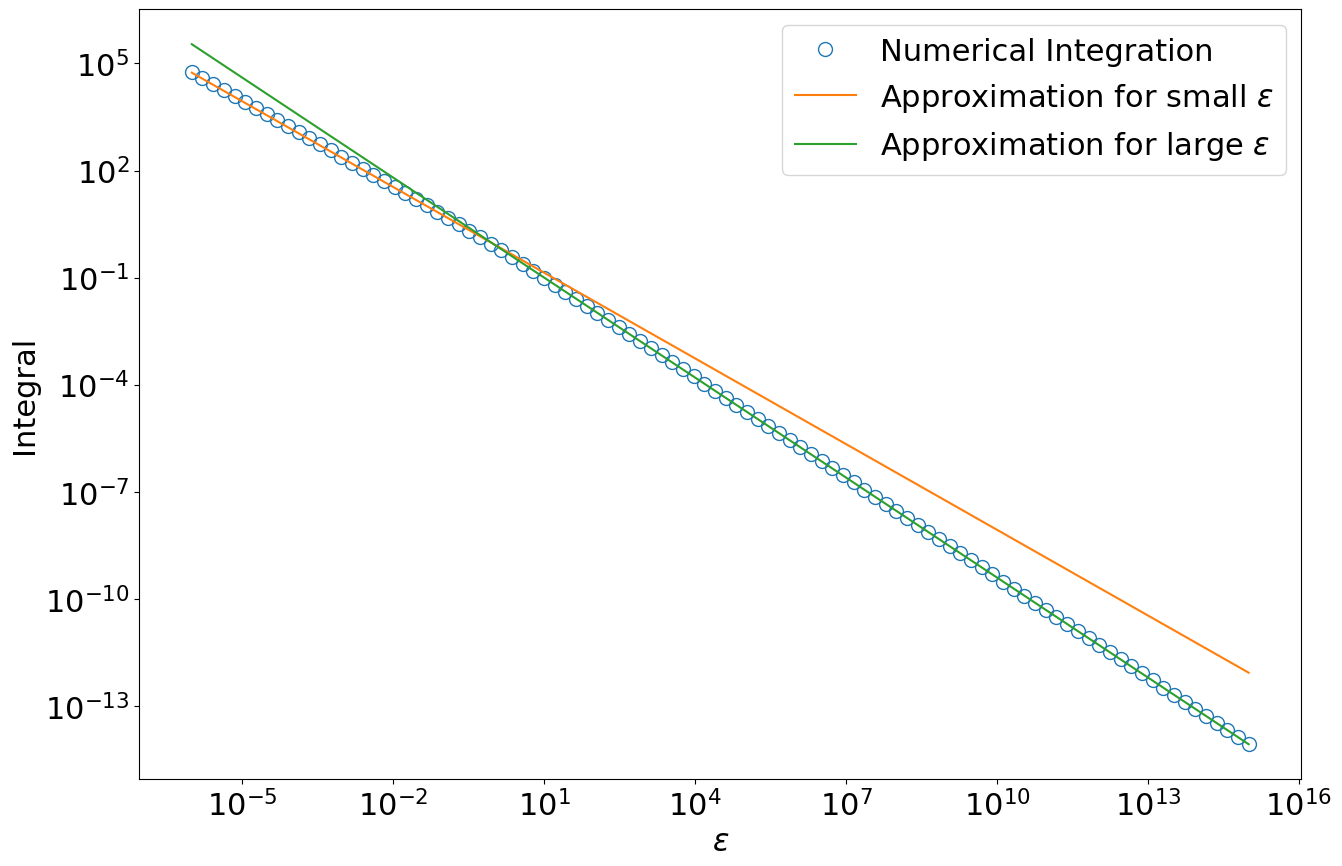

In [ ]:
  # Generate a random polynomial of the given degree
degree = 3
poly, degrees = generate_poly(degree)

    # Random upper limit for the integral
a = np.random.randint(0, 100)


    # Create an array of epsilon values
eps_list = np.logspace(-6, 15, 100)

    # Compute the integral numerically for each epsilon
I_eps = [integrate.quad(lambda x: 1/(eps + sum(poly[i] * x**degrees[i] for i in range(len(poly)))), 0, a)[0] for eps in eps_list]

    # Find the smallest and largest non-zero degrees in the polynomial
deg1, ind1 = find_smallest(degrees)
deg, ind = find_largest(degrees)

    # Approximate the integral for small and large epsilon values
smalleps = [1/eps * (1/poly[ind1]*eps)**(1/deg1) for eps in eps_list]
bigeps = [1/eps * (1/poly[ind]*eps)**(1/deg) for eps in eps_list]

    # Define epsilon as a sympy symbol
epsilon = sy.Symbol('epsilon')

    # Symbolic expressions for the approximations
smalleps_expr = 1/epsilon * (1/poly[ind1]*epsilon)**(1/deg1)
bigeps_expr = 1/epsilon * (1/poly[ind]*epsilon)**(1/deg)

plt.rcParams.update({'font.size': 22})
plt.figure(figsize=(15, 10))
plt.loglog(eps_list, np.abs(I_eps), 'o', mfc='none', markersize=10, label='Numerical Integration')
plt.loglog(eps_list, smalleps, label='Approximation for small $\epsilon$')
plt.loglog(eps_list, bigeps, label='Approximation for large $\epsilon$')
plt.xlabel('$\epsilon$')
plt.ylabel('Integral')
plt.legend(loc='best')

In [ ]:
print("eps_list = np.logspace(-6, 15, 100)")
ep = sy.symbols('\epsilon')
x = sy.symbols('x')
eq = 1/(ep + sum(poly[i] * x**degrees[i] for i in range(len(poly))))
eq1 = 'eq'
str1 = 'I_eps = [integrate.quad(lambda x:'
print(str1 , end =" " )
print(eq, end = ' ')
print(' for i in range(len(poly)))), 0,', end = ' ')
print(a, end = '' )
print(')[0] for eps in eps_list]')

print('smalleps = [', end = '')
print(1/ep * (1/poly[ind1]*ep)**(1/deg1), end = ' ')
print( 'for eps in eps_list]')

print('bigeps = [', end = ' ')
print(1/ep * (1/poly[ind]*ep)**(1/deg), end = ' ')
print('for eps in eps_list]')



eps_list = np.logspace(-6, 15, 100)
I_eps = [integrate.quad(lambda x: 1/(\epsilon + 2.0*x**5.0 + 9.0*x**15.0)  for i in range(len(poly)))), 0, 41)[0] for eps in eps_list]
smalleps = [0.870550563296124/\epsilon**0.8 for eps in eps_list]
bigeps = [ 0.863741591789829/\epsilon**0.933333333333333 for eps in eps_list]


# Slightly Harder Simple Integrals

Generate a random equation of the form $f(x) e^{-tg(x)}$, where $f(x)$ and $g(x)$ are complicated functions. We need to ensure that within the range of integration the integrand is not periodic.

In [ ]:
from random import sample

def generate_polynomial(degree, num_terms, coeff_lower_bound, coeff_upper_bound):

    # Initialize an array of zeros for the coefficients
    coefficients = [0] * (degree + 1)

    # Ensure the number of terms is valid
    if num_terms > degree + 1:
        raise ValueError("Number of terms cannot be more than the degree of the polynomial + 1")

    # Randomly choose positions for the non-zero coefficients
    non_zero_positions = sample(range(degree + 1), num_terms)

    # Assign random values within the bounds to the chosen positions
    for pos in non_zero_positions:
        coefficients[pos] = np.random.randint(coeff_lower_bound, coeff_upper_bound)

    # Ensure the highest degree term is non-zero
    if coefficients[-1] == 0:
        coefficients[-1] = np.random.randint(coeff_lower_bound, coeff_upper_bound)

    return coefficients

def polynomial_from_coefficients(coefficients, special_func_prob=1, power_prob=0.5):
    x, t = sy.symbols('x t')
    polynomial = sum(coef * x**i for i, coef in enumerate(coefficients[::-1]))

    # Check if a special function should be added
    if np.random.random() < special_func_prob:
        # List of special functions
        a = np.random.randint(1, 10)
        special_funcs = [sy.sin(a*x), sy.cos(a*x), a*x**2]

        # Choose one special function randomly
        special_func = np.random.choice(special_funcs)

        # Optionally raise the special function to a positive power
        if np.random.random() < power_prob:
            power = np.random.randint(1, 4)  # positive power between 1 and 4
            special_func = special_func**power

        # Modify the polynomial with the exponential of the special function
        polynomial = polynomial * sy.exp(-t * special_func)

    return polynomial



In [ ]:
x, t = sy.symbols('x t')
def interval(fx):
  fx = fx.subs(t, 1) # insert a random lambda value
  div = sy.diff(fx, x)
  sol = sy.nsolve(div, x,1) ## finding the height
  div2 = sy.diff(div, x)
  ## find the value of $\epsilon$ such that the second derivative changes sign, so we can terminate
  ## increasing $\epsilon$. The max value for $\epsilon$ is 1.
  epsilon = np.linspace(float(sol), float(sol)-1, 100)
  sign = float(div2.subs(x,sol))

  for eps in epsilon:
    temp = float(div2.subs(x,eps))
    if (temp*sign < 0): #sign changes
      break
    tempeps = eps

  return tempeps, sol

In [ ]:
def solve_hard_integral(degree, num_terms, coeff_lower_bound, coeff_upper_bound, special_func_prob=1, power_prob=0.5):
  coefficients = generate_polynomial(degree, num_terms, coeff_lower_bound, coeff_upper_bound)
  fx = polynomial_from_coefficients(coefficients)
  a, b = interval(fx)

  return fx, I_t, a, b, t_list


## Generate Problem Statement in Latex

In [ ]:
def create_latex_problem_statement(fx, a, b):
    # Convert the polynomial and limits to LaTeX strings
    fx_latex = sy.latex(fx)
    a_latex = sy.latex(a)
    b_latex = sy.latex(b)

    # Create the LaTeX problem statement
    problem_statement = f"""
    Consider the integral
    \\[
    I(t) = \\int_{{{a_latex}}}^{{{b_latex}}} {fx_latex} \\, dx
    \\]
    where the limits of integration are determined by the specified conditions.
    Develop an analytical formula for \\( I(t) \\) that is accurate as \\( t \\rightarrow \\infty \\).
    """

    return problem_statement

(-7*x**3 - 5*x**2 - 3)*exp(-t*x**2)

0.5893314030264573 1.02367483736989


'\n    Consider the integral \n    \\[\n    I(t) = \\int_{0.589331403026457}^{1.02367483736989} \\left(- 7 x^{3} - 5 x^{2} - 3\\right) e^{- t x^{2}} \\, dx\n    \\]\n    where the limits of integration are determined by the specified conditions. \n    Develop an analytical formula for \\( I(t) \\) that is accurate as \\( t \\rightarrow \\infty \\).\n    '

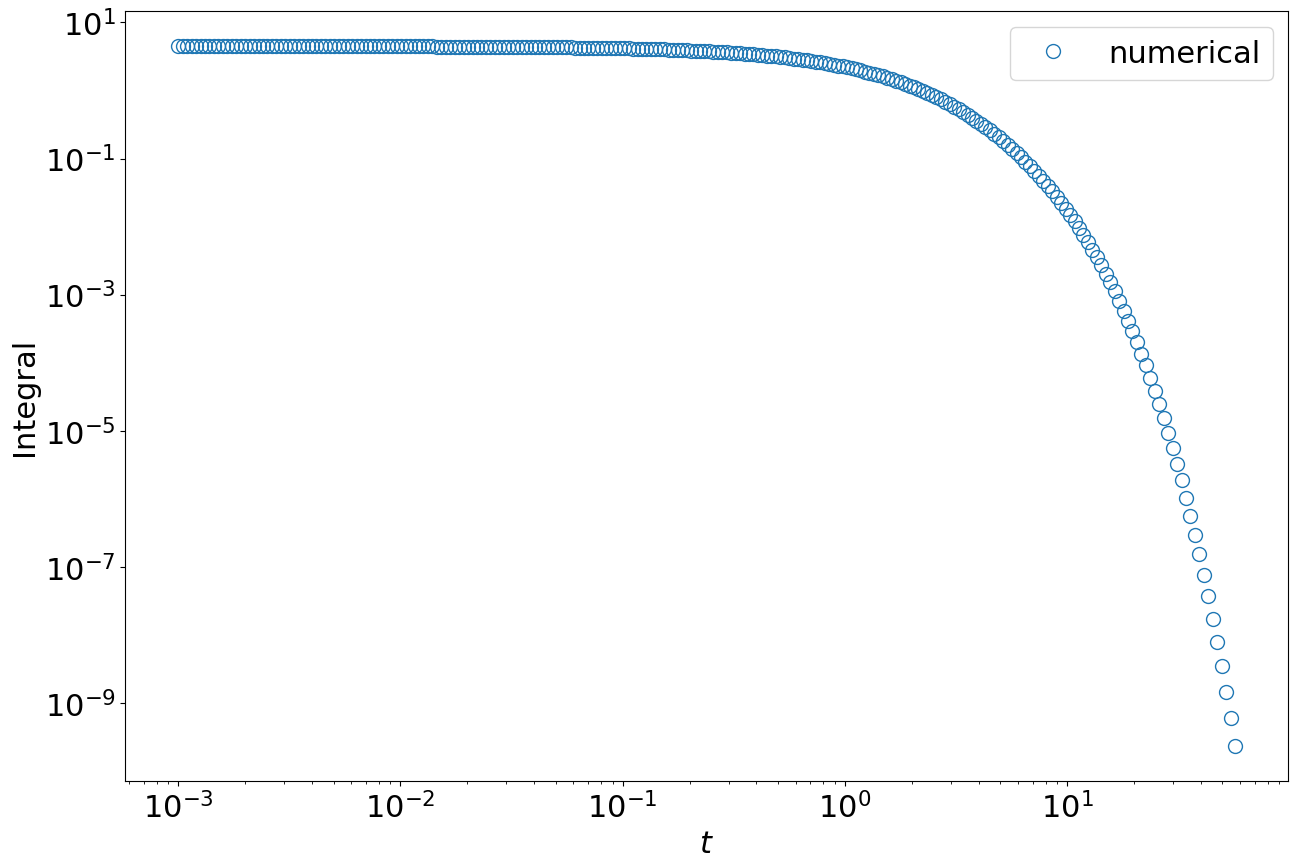

In [ ]:
fx, I_t, a, b, t_list = solve_hard_integral(degree=3, num_terms=3,coeff_lower_bound=-10,coeff_upper_bound=10)
latex_problem_statement = create_latex_problem_statement(fx, a, b)
display(fx)
print(a, b)
latex_problem_statement

## Approximate using Laplace

### Identify $f$ and $\phi$

In [ ]:
def identify_fx_phi(expression):
    x, t = sy.symbols('x t')

    # Initialize f(x) and phi(x)
    fx = None
    phi = None

    # Search for the exponential term
    for term in expression.args:
        if term.func is sy.exp:
            # This is the exponential term, extract phi(x)
            exp_arg = term.args[0]
            # Assuming the argument of exp is in the form of -t*phi(x)
            phi = -exp_arg / t
        else:
            # The remaining term should be f(x)
            fx = term

    # If fx is not identified, it means the expression is only the exponential term
    if fx is None:
        fx = 1  # f(x) is 1 in this case

    return fx, phi

## Find min of $\phi$

In [ ]:
def find_maximum_phi(phi, a, b):
    x = sy.symbols('x')

    # First derivative of phi
    phi_prime = sy.diff(phi, x)
    print(phi_prime, a, b)

    # Find critical points in the interval [a, b]
    critical_points = sy.solveset(phi_prime, x, domain=sy.Interval(a, b))
    critical_points = list(critical_points)
    print(critical_points)

    # Second derivative for the concavity test
    phi_double_prime = sy.diff(phi_prime, x)
    # print(phi_double_prime)

    # Initialize t0 and maximum value
    max_x = None
    max_value = -sy.oo  # Negative infinity

    for point in critical_points:
        # print(point)
        # Check if the second derivative is negative (indicating a maximum)
        print(phi_double_prime.subs(x, point))
        if phi_double_prime.subs(x, point) > 0:
            # Evaluate phi at this point
            value = phi.subs(x, point)
            if value > max_value:
                max_value = value
                max_x = point

    return max_x, max_value

## Finally, Laplace Approximation

In [ ]:
def laplace_approximation(fx, a, b):
    x = sy.symbols('x')
    t = sy.symbols('t')

    f, phi = identify_fx_phi(fx)
    print("f(x):", f)
    print("phi(x):", phi)
    x0, max_value = find_maximum_phi(phi, a, b)
    print("Maximum of phi(t) at x =", x0, "is", max_value)

    # Compute the second derivative of phi
    phi_double_prime = sy.diff(phi, x, x)

    # Evaluate phi and its second derivative at x = x0
    phi_x0 = phi.subs(x, x0)
    phi_double_prime_x0 = phi_double_prime.subs(x, x0)

    # Evaluate f at x = x0
    f_x0 = f.subs(x, x0)

    # Compute the approximation of I(t)
    I_t_approx = f_x0 * sy.exp(-t * phi_x0) * sy.sqrt(2 * sy.pi / (t * -phi_double_prime_x0))
    print("Approximation of I(t):", I_t_approx)

    return I_t_approx

## Test

In [ ]:
fx, I_t, a, b, t_list = solve_hard_integral(degree=3, num_terms=3,coeff_lower_bound=-10,coeff_upper_bound=10)
f, phi = identify_fx_phi(fx)
print("f(x):", f)
print("phi(x):", phi)

f(x): x**2 - 6*x - 3
phi(x): cos(x)**2


In [ ]:
x0, max_value = find_maximum_phi(phi, a, b)
print("Maximum of phi(t) at x =", x0, "is", max_value)

-2*sin(x)*cos(x) -0.5154423204300937 -0.313422118409892
[]
Maximum of phi(t) at x = None is -oo


In [ ]:
t = sy.symbols('t')
I_t_approx = laplace_approximation(phi, f, x0, t)
print("Approximation of I(t):", I_t_approx)

Approximation of I(t): 2*sqrt(pi)*sqrt(1/t)*exp(-t)


In [ ]:
fx, I_t, a, b, t_list = solve_hard_integral(degree=3, num_terms=3,coeff_lower_bound=-10,coeff_upper_bound=10)

t_list=10.**np.linspace(-3,2,300)
I_t = []

# stop running if it is going towards -infinity

for tval in t_list:
    integral = fx.subs(t, tval)
    f = sy.lambdify(x, integral, "numpy")
    integral_value = integrate.quad(f, a, b)[0]
    if (abs(integral_value) < 1e-10):
        break
    I_t.append(integral_value)

I_t_laplace = []
I_t_approx = laplace_approximation(fx, a, b)

for tval in t_list:
    I_t_laplace.append(I_t_approx.subs(t, tval))

f(x): 7*x**3 - 9*x**2 + 2*x + 4
phi(x): sin(4*x)**3
12*sin(4*x)**2*cos(4*x) 1.0991877249893922 1.22039984620151
[3*pi/8]
48
Maximum of phi(t) at x = 3*pi/8 is -1
Approximation of I(t): sqrt(6)*sqrt(pi)*sqrt(-1/t)*(-81*pi**2/64 + 3*pi/4 + 4 + 189*pi**3/512)*exp(t)/12


In [ ]:
display(fx)
latex_problem_statement = create_latex_problem_statement(fx, a, b)
latex_problem_statement

(7*x**3 - 9*x**2 + 2*x + 4)*exp(-t*sin(4*x)**3)

'\n    Consider the integral \n    \\[\n    I(t) = \\int_{1.09918772498939}^{1.22039984620151} \\left(7 x^{3} - 9 x^{2} + 2 x + 4\\right) e^{- t \\sin^{3}{\\left(4 x \\right)}} \\, dx\n    \\]\n    where the limits of integration are determined by the specified conditions. \n    Develop an analytical formula for \\( I(t) \\) that is accurate as \\( t \\rightarrow \\infty \\).\n    '

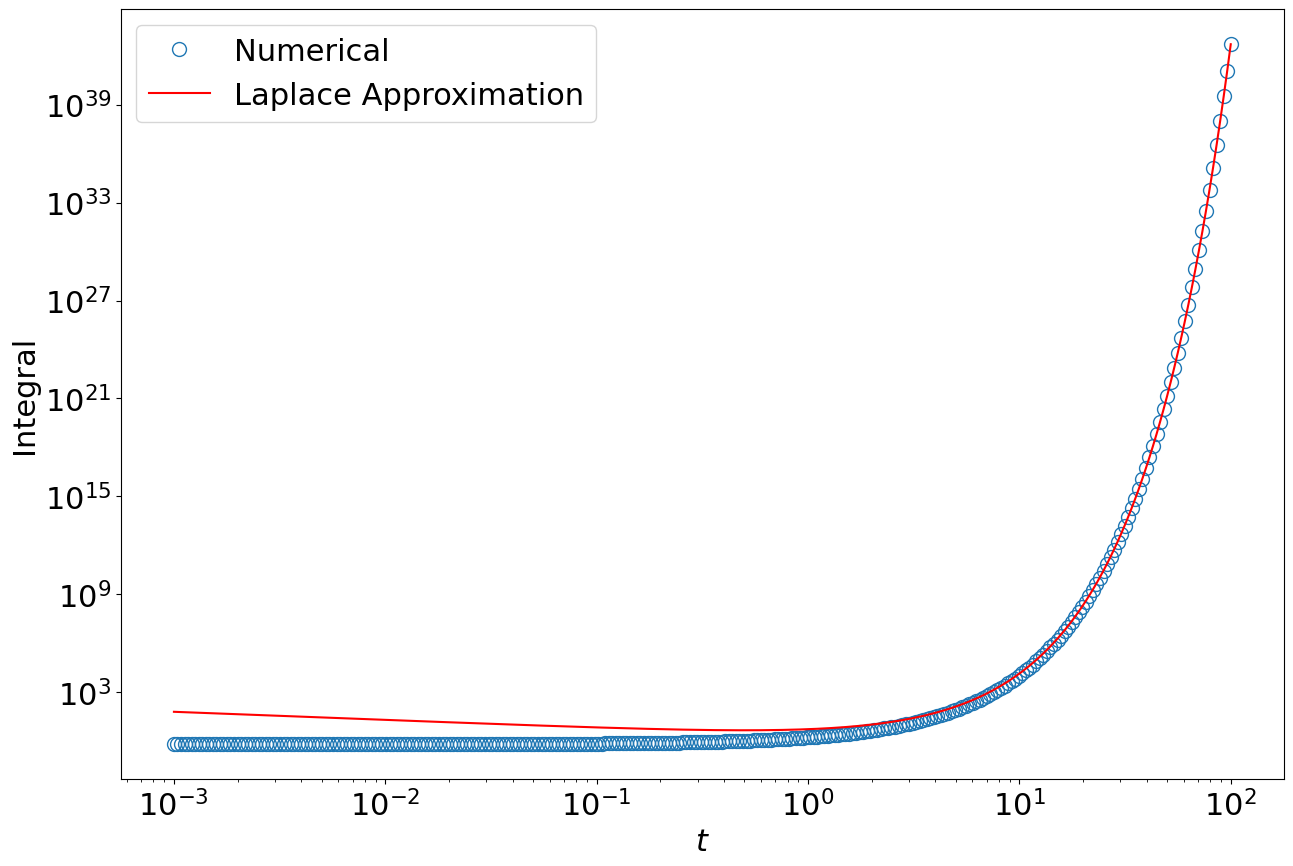

In [ ]:
# Plotting both numerical and Laplace approximation
plt.figure(figsize=(15,10))
plt.loglog(t_list[:len(I_t)], np.abs(I_t), 'o', mfc='none', markersize=10, label='Numerical')
plt.loglog(t_list, np.abs(I_t_laplace), '-', color='red', markersize=8, label='Laplace Approximation')
plt.xlabel('$t$')
plt.ylabel('Integral')
plt.legend(loc='best')
plt.show()

In [ ]:
def solve_approx(fx):


SyntaxError: ignored